In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the dataset
train_df = pd.read_csv('datasets/titanic/train.csv')
test_df = pd.read_csv('datasets/titanic/test.csv')

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
train_df['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [28]:
train_df.info()
for x in range(len(test_df['Fare'])):
    if pd.isnull(test_df['Fare'][x]):
        pclass = test_df['Pclass'][x]
        # mean_fare = train_df[train_df['Pclass'] == pclass]['Fare']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

<Axes: >

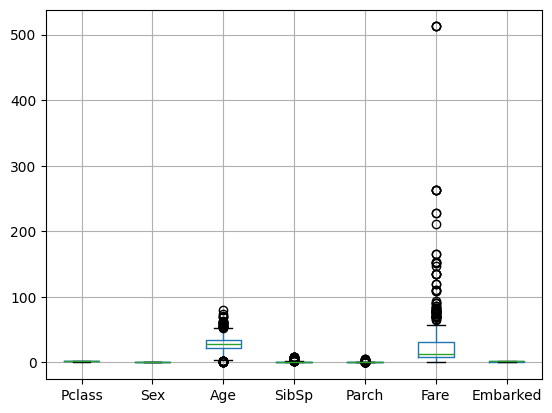

In [30]:
X_train.boxplot()

In [35]:
#Use standar scaler to transform data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

colname = X.columns
X_train =SS.fit_transform(X_train)

X_test = SS.transform(X_test)

X_train = pd.DataFrame(X_train, columns=colname)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.428546,0.709492,1.172762,0.302883,-0.457604,-0.127256,0.553589
1,-1.643215,-1.409460,-0.451384,1.843261,2.120039,4.052062,0.553589
2,-0.428546,0.709492,-0.838085,-0.467306,-0.457604,-0.382952,0.553589
3,-0.428546,0.709492,0.012658,0.302883,-0.457604,-0.215427,0.553589
4,0.786123,0.709492,-1.302127,0.302883,-0.457604,-0.387507,-2.081139


<Axes: >

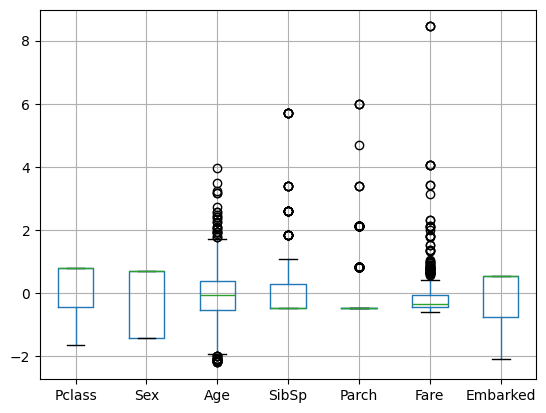

In [37]:
X_train.boxplot()

In [40]:
# Train the model
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
# Make predictions
y_pred = clf.predict(X_test)

In [42]:
import matplotlib.pyplot as plt
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.773542600896861
Confusion Matrix:
[[210  57]
 [ 44 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       267
           1       0.70      0.75      0.73       179

    accuracy                           0.77       446
   macro avg       0.76      0.77      0.77       446
weighted avg       0.78      0.77      0.77       446



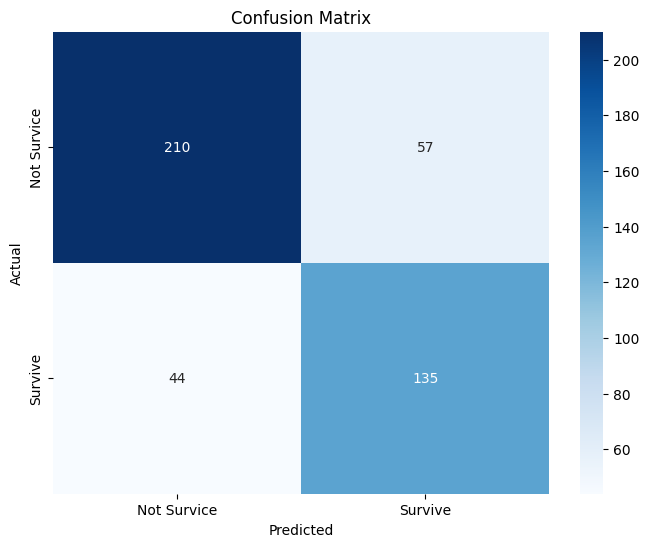

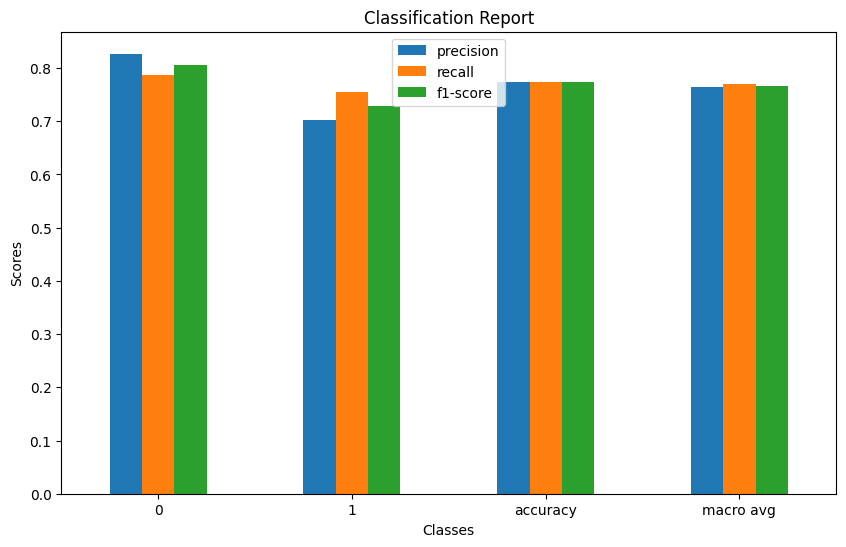

In [45]:
# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
ax.set_xticklabels(['Not Survice', 'Survive'])
ax.set_yticklabels(['Not Survice', 'Survive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get classification report as a dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for easier plotting
report_df = pd.DataFrame(class_report).transpose()

# Plotting the classification report
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()

In [53]:
# Model Development - Random Forest
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

acc_RF = accuracy_score(y_pred, y_test) * 100
print("The accuracy for RF model is (%): ", acc_RF)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

The accuracy for RF model is (%):  78.47533632286996
Accuracy: 0.7847533632286996
Confusion Matrix:
[[217  50]
 [ 46 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       267
           1       0.73      0.74      0.73       179

    accuracy                           0.78       446
   macro avg       0.78      0.78      0.78       446
weighted avg       0.79      0.78      0.79       446



In [60]:
from sklearn.model_selection import KFold

kfcv = KFold(n_splits=5)

accuracy_list = []
for (k, (train, test)) in enumerate(kfcv.split(X, y)):
    # Feature scaling
    standard_scaler = StandardScaler()
    x_train_split = X.iloc[train]
    x_train_split = standard_scaler.fit_transform(x_train_split)
    x_test_split = standard_scaler.transform(X.iloc[test])
    model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    model.fit(x_train_split, y.iloc[train])

    # Model evaluation
    print('Split number #', k + 1)
    predictions = model.predict(x_test_split)
    print('Confusion matrix: \n', confusion_matrix(y.iloc[test], predictions))
    print('Clasification report: \n', classification_report(y.iloc[test], predictions))
    accuracy_list.append(accuracy_score(y.iloc[test], predictions))

Split number # 1
Confusion matrix: 
 [[95 25]
 [17 42]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       120
           1       0.63      0.71      0.67        59

    accuracy                           0.77       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.78      0.77      0.77       179

Split number # 2
Confusion matrix: 
 [[85 14]
 [26 53]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.79      0.67      0.73        79

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.77       178

Split number # 3
Confusion matrix: 
 [[94 15]
 [18 51]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       1

In [61]:
accuracy_np = np.array(accuracy_list)
print(accuracy_np.mean())

0.7822861088443914


In [62]:
# Model saving / loading
import pickle as pkl

# Save model
with open('dt_model.pkl', 'wb') as f:
    pkl.dump(model, f)
    

In [64]:
# load model
with open('dt_model.pkl', 'rb') as f:
    saved_model = pkl.load(f)

type(saved_model)

sklearn.tree._classes.DecisionTreeClassifier

In [65]:
new_prediction = saved_model.predict(x_test_split)
print(new_prediction)

[1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0]
